In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
df = pd.read_csv('spam.csv',encoding='latin-1')[['v1','v2']]

In [ ]:
df.columns = ['label','text']

In [ ]:
df['label']= df['label'].map({'ham':0,'spam':1})

In [ ]:
print(df.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


1. Guassian Naive Bayes (For Continuous Data)

In [ ]:
df['text_length']= df['text'].apply(len)
df['num_words']= df['text'].apply(lambda x: len(x.split()))
df['num_digits']= df['text'].apply(lambda x: sum(c.isdigit() for c in x))

X = df[['text_length','num_words','num_digits']]
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb= gnb.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

In [ ]:
print("Accuracy:", accuracy_gnb)

Accuracy: 0.9802690582959641


In [ ]:
confusion_matrix(y_test, y_pred_gnb)

array([[953,  12],
       [ 10, 140]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.92      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



2. Multinomial Naive Bayes(For Text Data)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
vectorizer = CountVectorizer(stop_words = 'english')
X_counts = vectorizer.fit_transform(df['text'])

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))

Accuracy: 0.968609865470852


In [ ]:
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
print(confusion_matrix(y_test, y_pred_mnb))

[[965   0]
 [ 35 115]]


3. Bernoulli Naive Bayes (For Binary Features)

In [ ]:
important_words = ['free','win','offer','money','urgent']
for word in important_words:
  df[word] = df['text'].apply(lambda x: 1 if word in x.lower() else 0)

In [ ]:
x = df[important_words]
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import BernoulliNB
berno = BernoulliNB()
berno.fit(X_train, y_train)
y_pred_berno = berno.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_berno))

Accuracy: 0.895067264573991


In [ ]:
print(classification_report(y_test, y_pred_berno))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       965
           1       0.66      0.46      0.54       150

    accuracy                           0.90      1115
   macro avg       0.79      0.71      0.74      1115
weighted avg       0.88      0.90      0.89      1115



In [ ]:
print(confusion_matrix(y_test, y_pred_berno))

[[929  36]
 [ 81  69]]


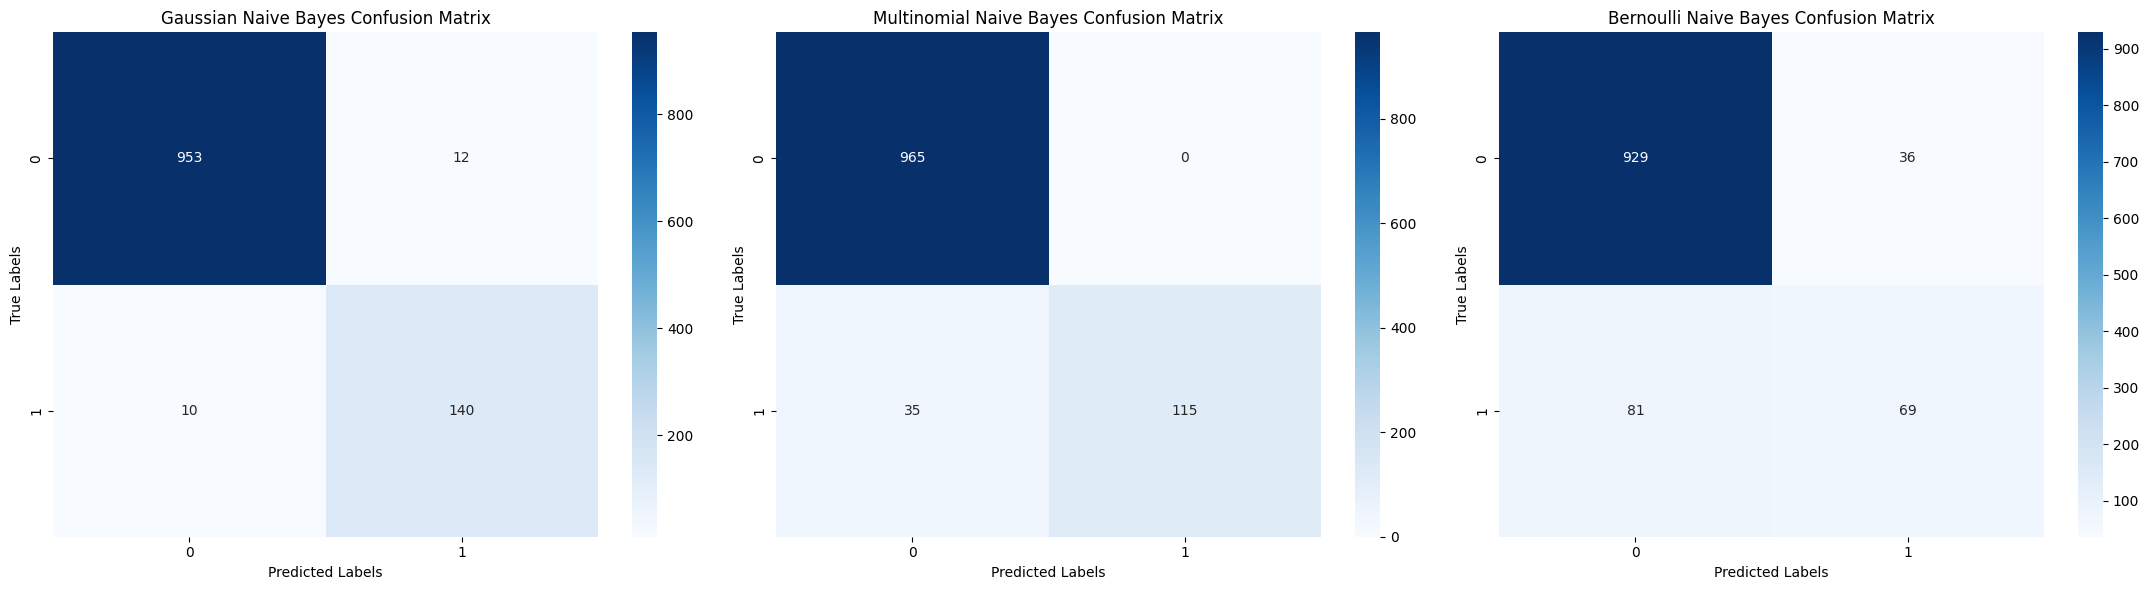

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Gaussian Naive Bayes Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Multinomial Naive Bayes Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

sns.heatmap(confusion_matrix(y_test, y_pred_berno), annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Bernoulli Naive Bayes Confusion Matrix')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

Load the dataset and explore the message content and labels.                         
Identify how many messages belong to each category.                         
Build a probabilistic classification model that can learn patterns from word occurrences.              
Train the model using historical message data.
Predict whether unseen messages are:             
Suspicious             
Not suspicious            
Test the system using custom user-entered messages.                  
Evaluate the model using appropriate classification metrics.            
Analyze the following:                 
How many suspicious messages were correctly identified?                 
How many genuine messages were incorrectly flagged?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (2).csv


In [ ]:
df_new = pd.read_csv('spam (2).csv',encoding='latin-1')[['v1','v2']]

In [ ]:
df.columns


Index(['label', 'text'], dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report


if df['label'].dtype == object:
    df['label'] = df['label'].astype(str).str.strip().str.lower()
    df = df[df['label'].isin(['ham', 'spam'])]
    df['label'] = df['label'].map({'ham': 0, 'spam': 1})


df = df.dropna(subset=['label', 'text'])


X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)


vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


model = MultinomialNB()
model.fit(X_train_vec, y_train)


y_pred = model.predict(X_test_vec)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

print("Analysis Results:")
print(f"Suspicious messages correctly identified (TP): {TP}")
print(f"Genuine messages incorrectly flagged (FP): {FP}")



Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Analysis Results:
Suspicious messages correctly identified (TP): 137
Genuine messages incorrectly flagged (FP): 6


In [ ]:
def predict_message(message):
    vec = vectorizer.transform([message])
    pred = model.predict(vec)[0]
    prob = model.predict_proba(vec)[0][pred]

    if pred == 1:
        return f"Suspicious (confidence: {prob:.2f})"
    else:
        return f"Not Suspicious (confidence: {prob:.2f})"

print(predict_message("Congratulations! You won a free phone"))
print(predict_message("Are we meeting at 6 pm today?"))


Suspicious (confidence: 0.99)
Not Suspicious (confidence: 0.99)


Probabilistic classification model        
 Learns from word occurrences         
 Trained on historical messages             
 Predicts Suspicious / Not Suspicious            
 Tests user-entered messages             
 Evaluated using classification metrics